In [16]:
from sklearn import datasets, model_selection, tree, ensemble
import matplotlib.pyplot as plt
import numpy as np

In [17]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

scores_dtc = model_selection.cross_val_score(tree.DecisionTreeClassifier(random_state=1), X, y, cv=10)
print(scores_dtc.mean())

0.8241154562383614


In [18]:
bagging_classifier = ensemble.BaggingClassifier(tree.DecisionTreeClassifier(random_state=1), 100, random_state=1)
scores_bag_class = model_selection.cross_val_score(bagging_classifier, X, y, cv=10)
print(scores_bag_class.mean())

0.922054624456859


In [30]:
bagging_classifier_sqrt = ensemble.BaggingClassifier(tree.DecisionTreeClassifier(), 100, bootstrap_features=True)
scores_bag_class_sqrt = model_selection.cross_val_score(bagging_classifier_sqrt, X, y, cv=10)
print(scores_bag_class_sqrt.mean())

0.9432184978274363


In [20]:
bagging_classifier_rand = ensemble.BaggingClassifier(tree.DecisionTreeClassifier(random_state=1, splitter='random'), 100, bootstrap=False, bootstrap_features=True, random_state=1)
scores_bag_class_rand = model_selection.cross_val_score(bagging_classifier_rand, X, y, cv=10)
print(scores_bag_class_rand.mean())

0.9599317194289261


In [23]:
def plot_scores(x, y, name):
  
  plt.grid(True)
  plt.plot(x,  y)
  plt.xlabel('Parameters')
  plt.ylabel('Scores')
  plt.title(name)


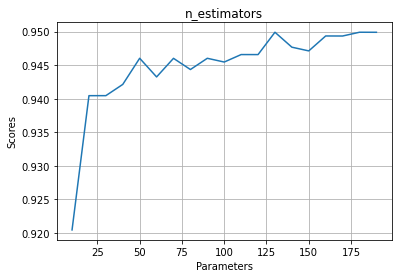

In [24]:
n_est = np.arange(10, 200, 10)
scores_bag_est = []
for p in n_est:
  rand_forest = ensemble.RandomForestClassifier(n_estimators=p, random_state=1)
  scores_bag_est.append(model_selection.cross_val_score(rand_forest, X, y, cv=10).mean())

plot_scores(n_est, scores_bag_est, 'n_estimators')

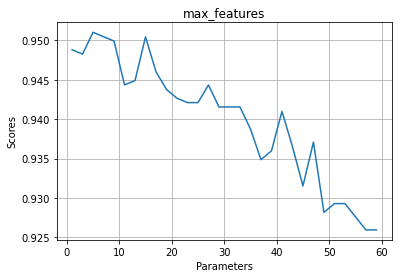

In [26]:
features = np.arange(1, 60, 2)
scores_bag_features = []
for p in features:
  rand_forest = ensemble.RandomForestClassifier(max_features = p, random_state=1)
  scores_bag_features.append(model_selection.cross_val_score(rand_forest, X, y, cv=10).mean())

plot_scores(features, scores_bag_features, 'max_features')

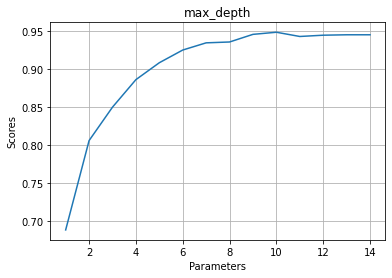

In [28]:
depth = np.arange(1, 15, 1)
scores_bag_depth = []
for p in depth:
  rand_forest = ensemble.RandomForestClassifier(max_depth = p, random_state=1)
  scores_bag_depth.append(model_selection.cross_val_score(rand_forest, X, y, cv=10).mean())

plot_scores(depth, scores_bag_depth, 'max_depth')